In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import glob

In [5]:
! pwd

/Users/ben/git_repos/ATM_waveform/mc_code


In [3]:
N_MC=1.e7

In [4]:
! grep buf small_mc_dist_depth.c

grep: small_mc_dist_depth.c: No such file or directory


In [23]:
D_MC={}
# load in the MC results, calculate P as a function of L
D_MC['la']=np.cumsum(np.concatenate([[0], np.logspace(-2, 1, 500)]))
D_MC['lb']=np.concatenate([D_MC['la'][1:], [D_MC['la'][-1]+10]])
D_MC['lc']=0.5*(D_MC['la']+D_MC['lb']);
hist_edges=np.concatenate([D_MC['la'], [D_MC['lb'][-1]]])
D_MC['P']=np.zeros_like(D_MC['la'])

for file in glob.glob(thedir+'/*'):
    D=np.fromfile(file, count=-1)
    D=D.reshape(int(len(D)/10), 10)
    counts, _ = np.histogram(D[D[:,2]<10, 6], hist_edges)
    D_MC['P'] += counts/N_MC


In [47]:
?np.erf

Object `np.erf` not found.


In [41]:
{key: len(D_MC[key]) for key in D_MC.keys()}

{'la': 501, 'lb': 501, 'lc': 501, 'P': 501}

<IPython.core.display.Javascript object>


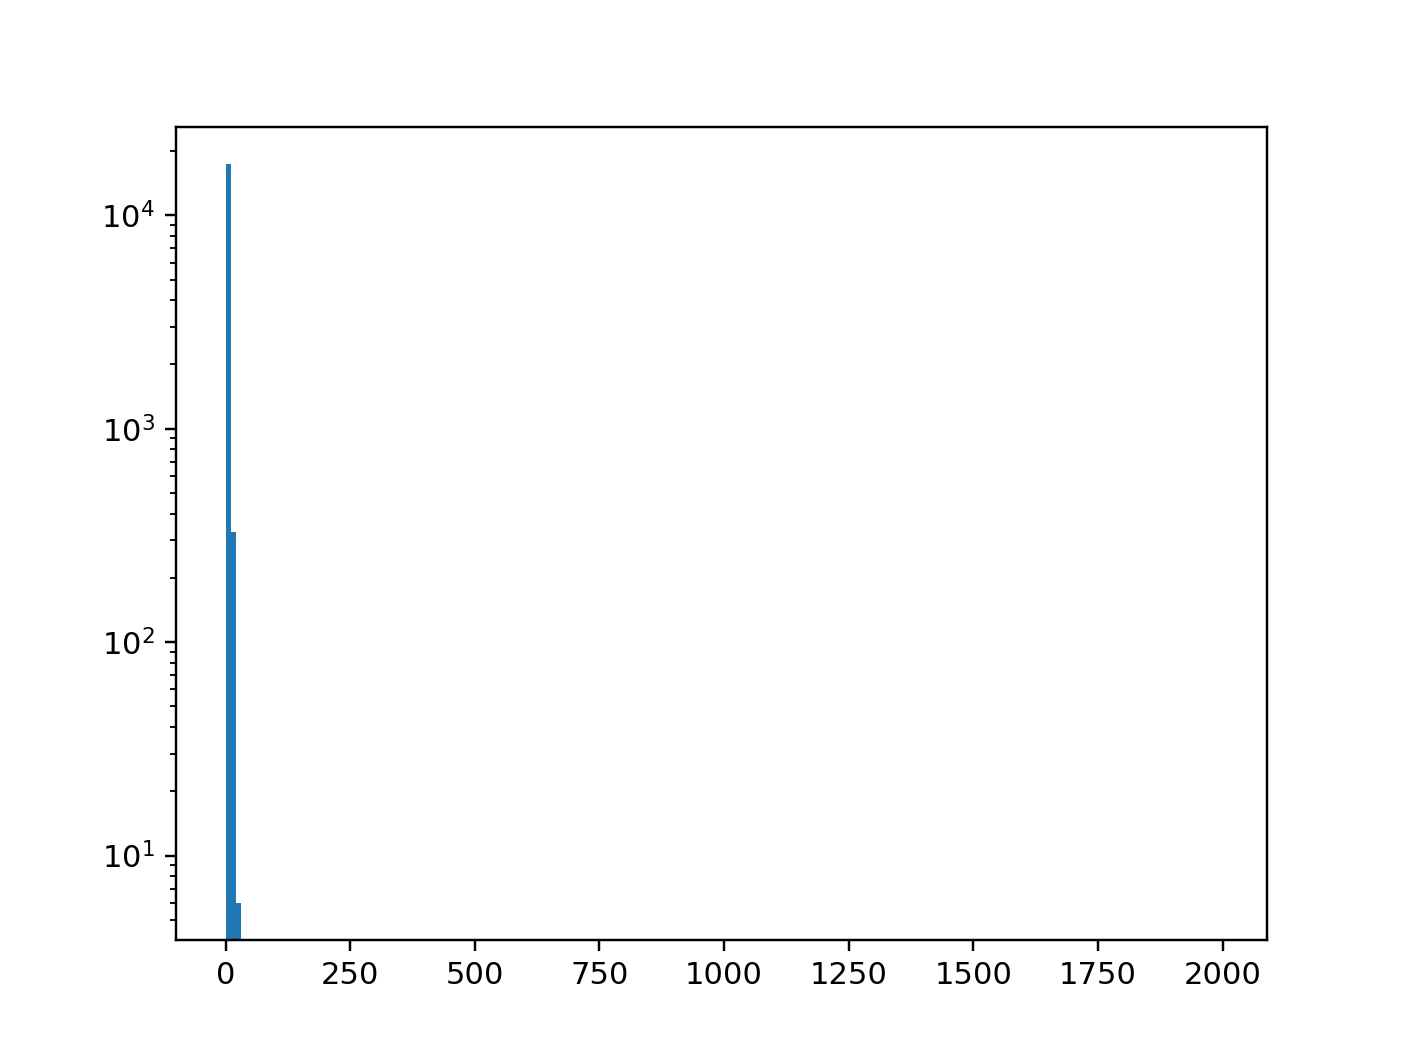

In [7]:
plt.figure(); plt.hist(D[:,6], np.arange(0, 2000, 10))
plt.gca().set_yscale('log')

<IPython.core.display.Javascript object>


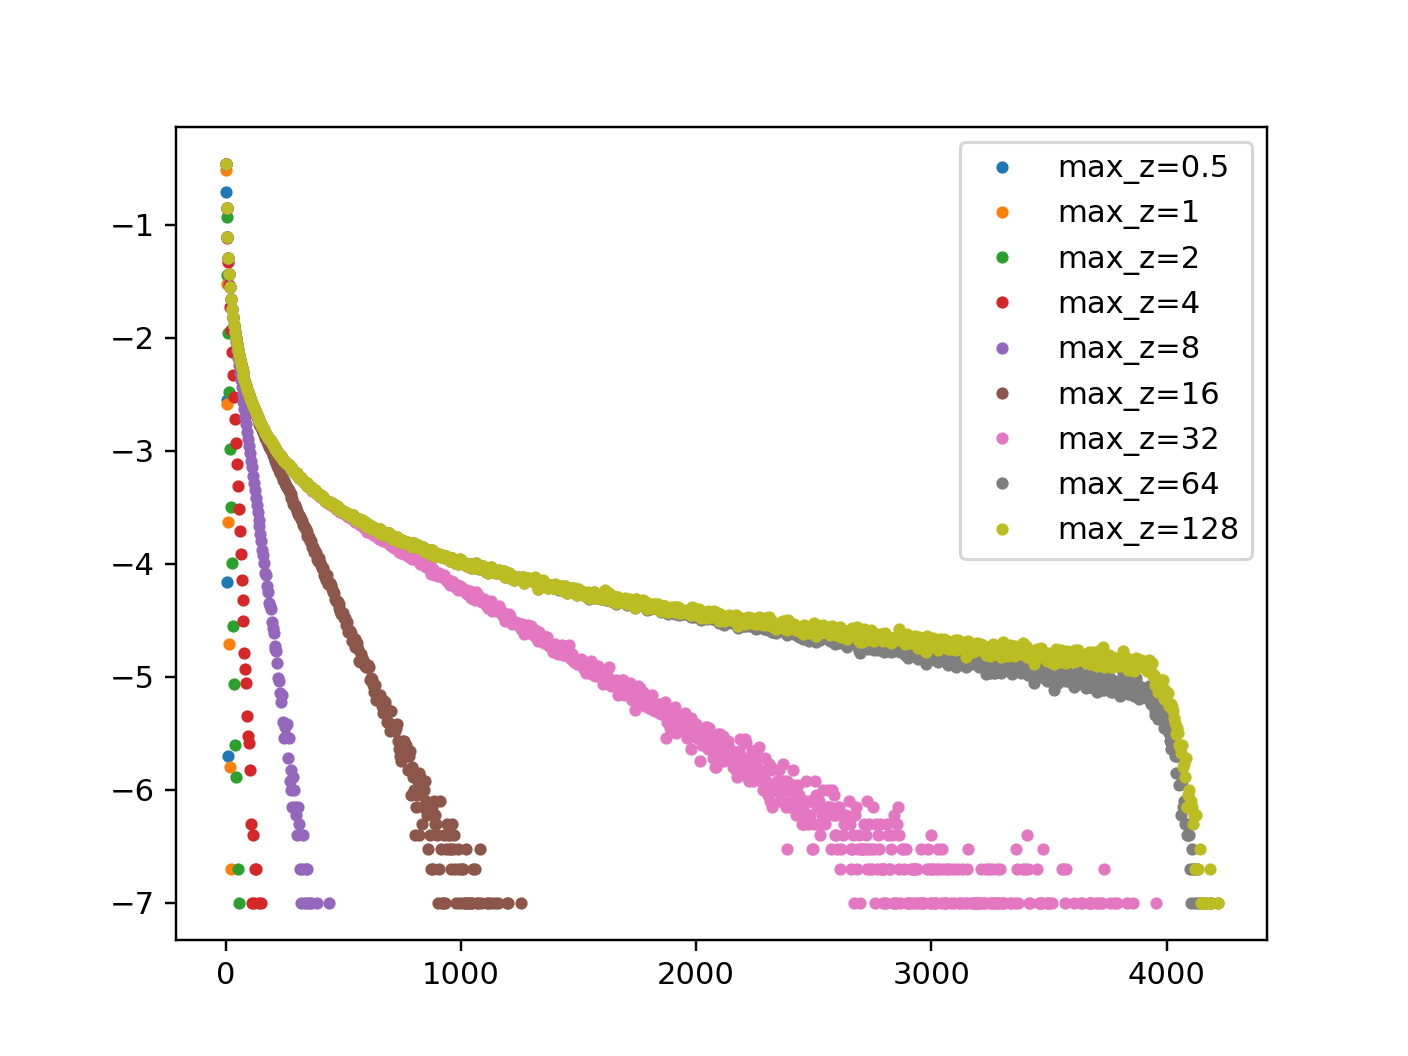

<IPython.core.display.Javascript object>


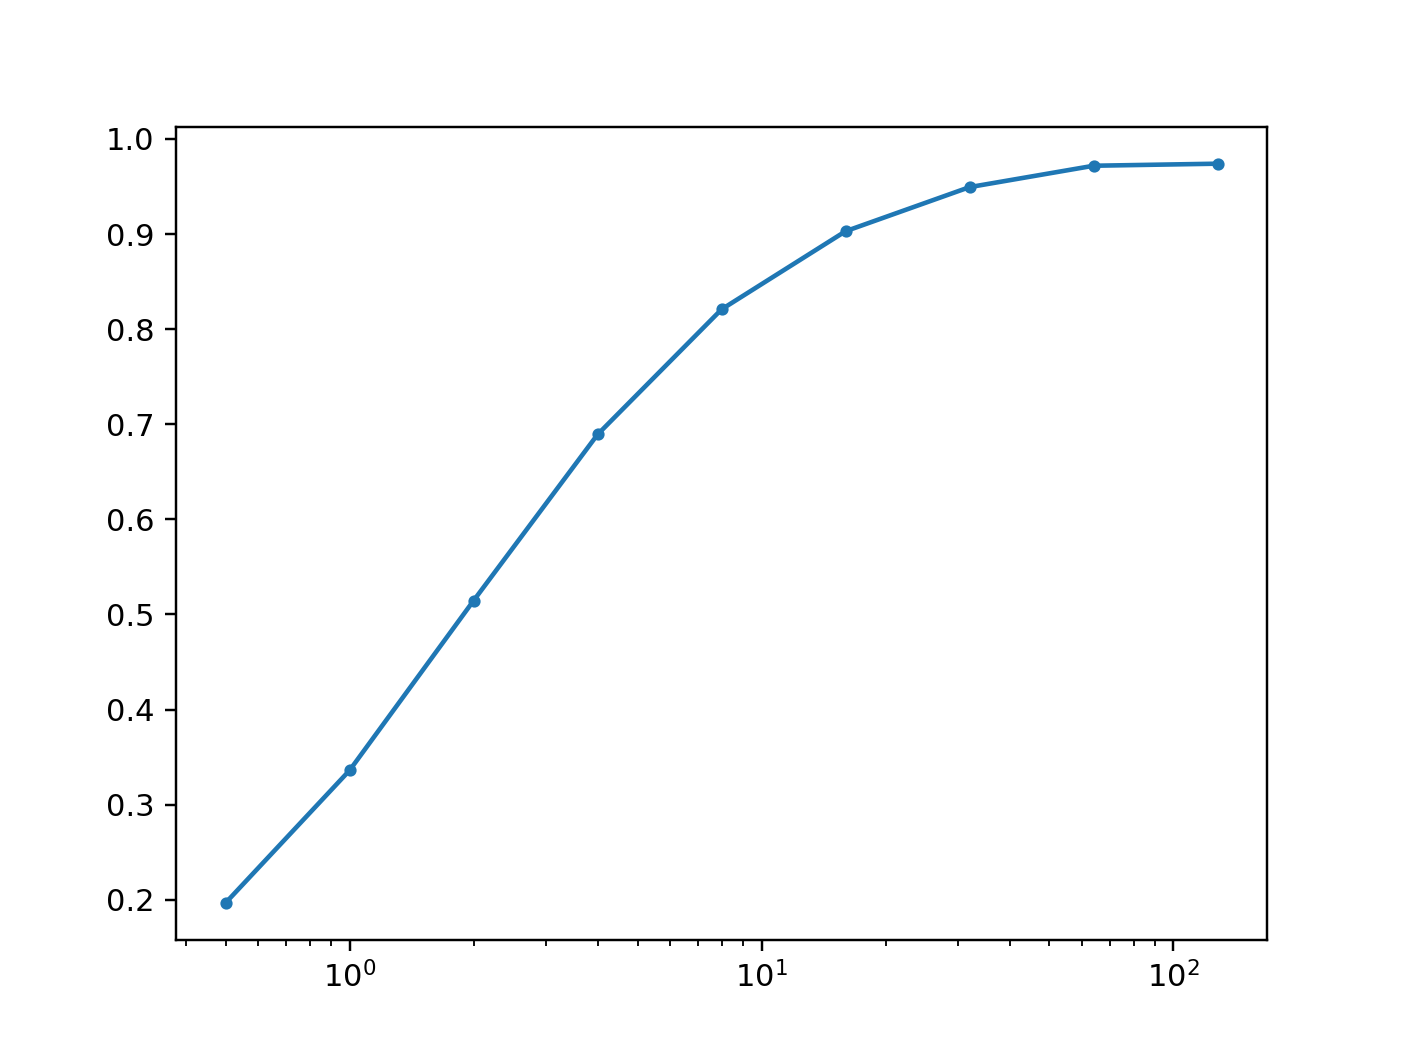

In [105]:
max_z=[0.5, 1, 2, 4, 8, 16, 32, 64, 128]
bin_size=4

counts=np.zeros((4000, len(max_z)))+np.NaN
                
for col, zi in enumerate(max_z):
    these=D[:,7] < zi
    n=np.bincount(np.floor(D[these,6]/bin_size).astype(int)).astype(float)
    n[n==0]=np.NaN
    last_bin = np.minimum(counts.shape[0], len(n))
    counts[0:last_bin, col] = n[0:last_bin]
    
plt.figure(); 
for col, zi in enumerate(max_z):
    plt.plot(bin_size*np.arange(counts.shape[0]), np.log10(counts[:,col]/1.e7),'.', label=f'max_z={zi}')
plt.legend()

plt.figure(); plt.plot(max_z, np.nansum(counts, axis=0)/1.e7, marker='.')
#plt.gca().set_yscale('log')
plt.gca().set_xscale('log')


<IPython.core.display.Javascript object>


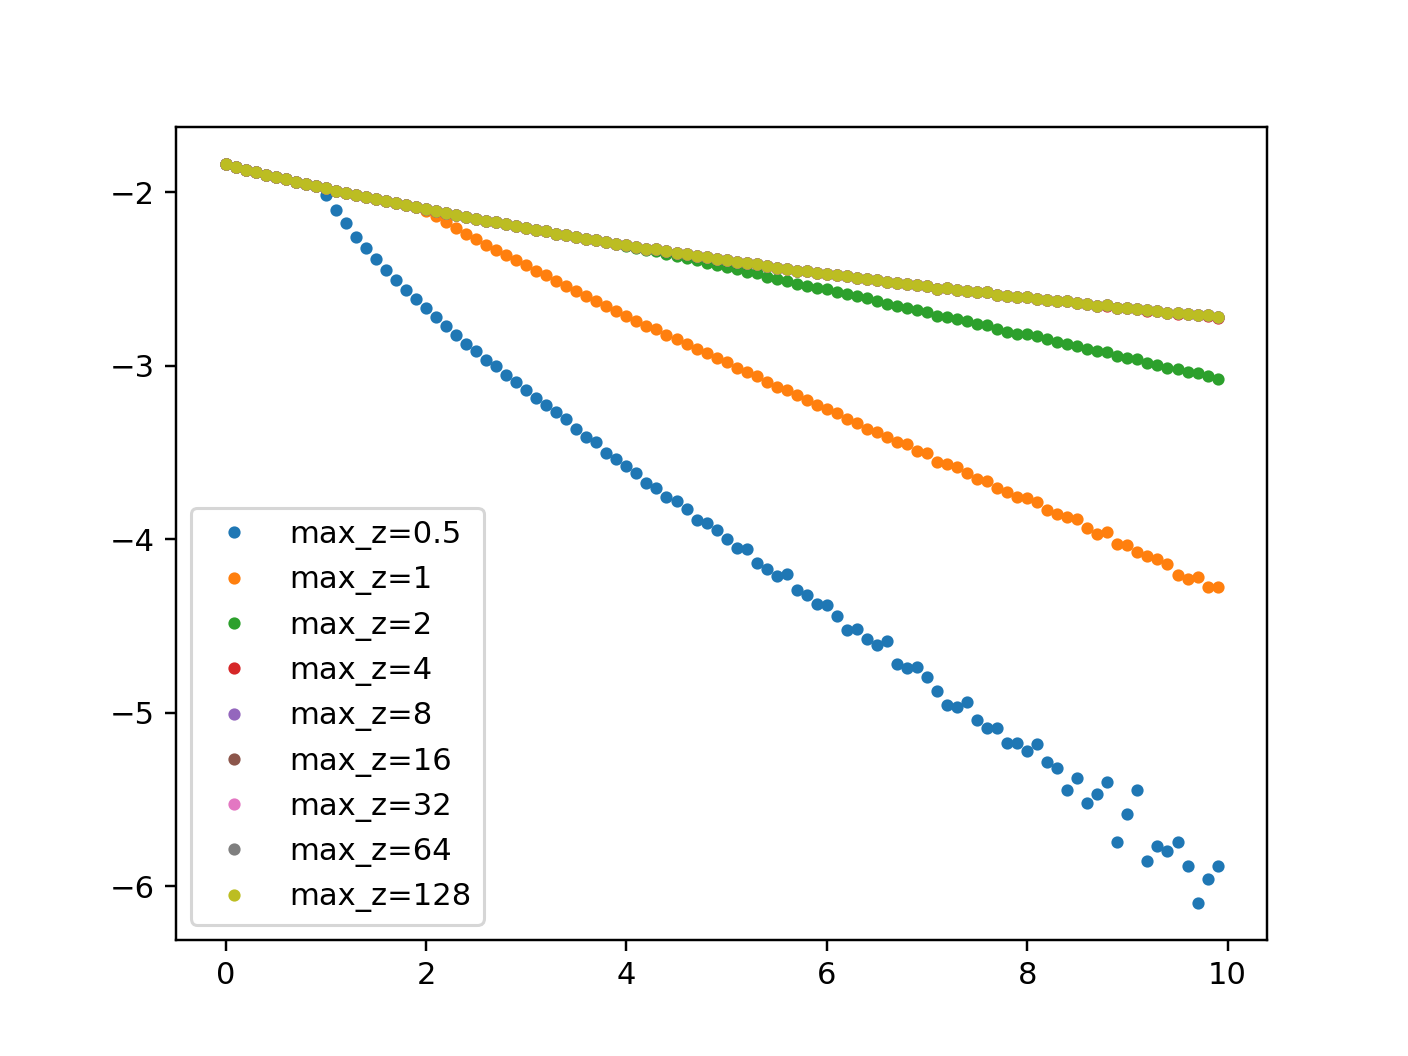

In [106]:
max_z=[0.5, 1, 2, 4, 8, 16, 32, 64, 128]
bin_size=0.1
L_max = 10

counts=np.zeros((int(L_max/bin_size+1), len(max_z)))+np.NaN
                
for col, zi in enumerate(max_z):
    these=(D[:,7] < zi) & (D[:,6] < L_max)
    n=np.bincount(np.floor(D[these,6]/bin_size).astype(int)).astype(float)
    n[n==0]=np.NaN
    last_bin = np.minimum(counts.shape[0], len(n))
    counts[0:last_bin, col] = n[0:last_bin]
    
plt.figure(); 
for col, zi in enumerate(max_z):
    plt.plot(bin_size*np.arange(counts.shape[0]), np.log10(counts[:,col]/1.e7),'.', label=f'max_z={zi}')
plt.legend()

<IPython.core.display.Javascript object>


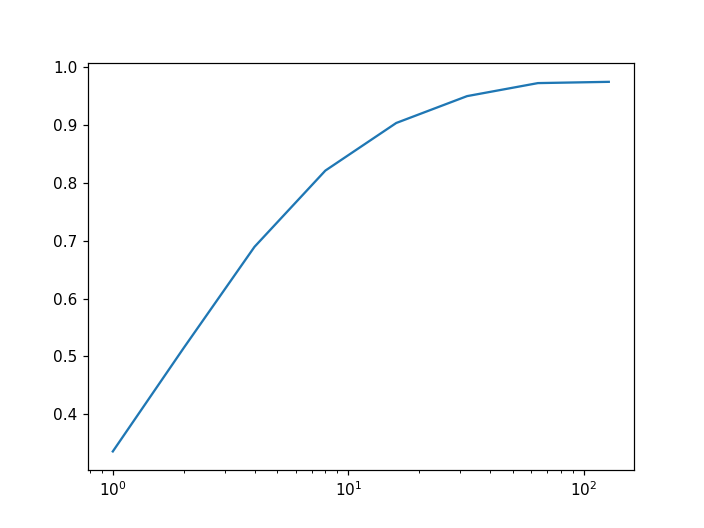

<IPython.core.display.Javascript object>


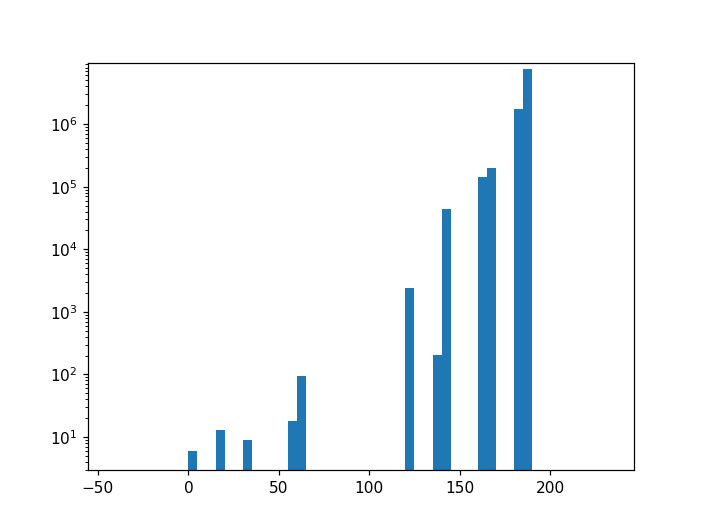

In [69]:
plt.figure(); plt.hist(D[:,7], np.arange(0, 2000, 5))
plt.gca().set_yscale('log')

In [32]:
D.shape


(9479469, 10)

In [34]:
?numpy.hist*